In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from pprint import pprint

covid_clean_CA_TX=pd.read_csv("../Resources/covid_clean_CA_TX.csv", encoding="ISO-8859-1")

In [4]:
covid_clean_CA_TX

,State,countyFIPS,County Name,population,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,10/21/2020,10/22/2020,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020,10/29/2020,10/30/2020
0,CA,6000,Grand Princess Cruise Ship,0,6,0,0,0,0,0,...,21,21,21,21,21,21,21,21,21,21
1,CA,6001,Alameda County,1671329,6,0,0,0,0,0,...,22932,23001,23133,23215,23312,23391,23391,23576,23636,23775
2,CA,6003,Alpine County,1129,6,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
3,CA,6005,Amador County,39752,6,0,0,0,0,0,...,276,287,291,291,291,299,301,302,308,311
4,CA,6007,Butte County,219186,6,0,0,0,0,0,...,3018,3030,3047,3047,3047,3073,3073,3113,3127,3144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,TX,48499,Wood County,45539,48,0,0,0,0,0,...,621,623,626,626,626,633,636,639,655,655
309,TX,48501,Yoakum County,8713,48,0,0,0,0,0,...,289,289,289,289,289,289,289,300,304,319
310,TX,48503,Young County,18010,48,0,0,0,0,0,...,497,507,521,535,535,535,559,578,591,605
311,TX,48505,Zapata County,14179,48,0,0,0,0,0,...,342,342,343,345,346,346,352,352,352,357


In [5]:
#drop unnecessary column and just get the cases and state
daily_cases= covid_clean_CA_TX.drop(columns=['countyFIPS','County Name','stateFIPS','population'])
daily_cases

,State,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,10/21/2020,10/22/2020,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020,10/29/2020,10/30/2020
0,CA,0,0,0,0,0,0,0,0,0,...,21,21,21,21,21,21,21,21,21,21
1,CA,0,0,0,0,0,0,0,0,0,...,22932,23001,23133,23215,23312,23391,23391,23576,23636,23775
2,CA,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
3,CA,0,0,0,0,0,0,0,0,0,...,276,287,291,291,291,299,301,302,308,311
4,CA,0,0,0,0,0,0,0,0,0,...,3018,3030,3047,3047,3047,3073,3073,3113,3127,3144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,TX,0,0,0,0,0,0,0,0,0,...,621,623,626,626,626,633,636,639,655,655
309,TX,0,0,0,0,0,0,0,0,0,...,289,289,289,289,289,289,289,300,304,319
310,TX,0,0,0,0,0,0,0,0,0,...,497,507,521,535,535,535,559,578,591,605
311,TX,0,0,0,0,0,0,0,0,0,...,342,342,343,345,346,346,352,352,352,357


In [6]:
#tranpose the columns and rows 
daily_cases=daily_cases.set_index("State")
new_transpose1=daily_cases.T
new_transpose1

State,CA,CA,CA,CA,CA,CA,CA,CA,CA,CA,...,TX,TX,TX,TX,TX,TX,TX,TX,TX,TX
1/22/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/26/2020,21,23391,3,299,3073,342,551,18763,180,1351,...,1228,9335,998,140,908,633,289,535,346,461
10/27/2020,21,23391,3,301,3073,342,551,18763,180,1351,...,1231,9418,1000,142,925,636,289,559,352,463
10/28/2020,21,23576,3,302,3113,347,553,18877,180,1368,...,1232,9479,1003,149,930,639,300,578,352,466
10/29/2020,21,23636,3,308,3127,347,555,18981,181,1380,...,1232,9509,1006,150,944,655,304,591,352,469


In [21]:
CA_cases= new_transpose1["CA"].diff()
CA_cases

State,CA,CA,CA,CA,CA,CA,CA,CA,CA,CA,...,CA,CA,CA,CA,CA,CA,CA,CA,CA,CA
1/22/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/26/2020,0.0,79.0,0.0,8.0,26.0,0.0,1.0,69.0,2.0,36.0,...,149.0,57.0,28.0,0.0,2.0,95.0,7.0,141.0,41.0,30.0
10/27/2020,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,182.0,28.0,13.0,51.0,0.0,140.0,4.0,26.0,12.0,11.0
10/28/2020,0.0,185.0,0.0,1.0,40.0,5.0,2.0,114.0,0.0,17.0,...,0.0,46.0,11.0,0.0,1.0,0.0,6.0,60.0,15.0,4.0
10/29/2020,0.0,60.0,0.0,6.0,14.0,0.0,2.0,104.0,1.0,12.0,...,75.0,54.0,8.0,6.0,0.0,70.0,3.0,78.0,16.0,8.0


In [46]:
#group by state
group_by_state=daily_cases.groupby(["State"]).sum()
new_transpose2=group_by_state.T
new_transpose2

State,CA,TX
1/22/2020,0,0
1/23/2020,0,0
1/24/2020,0,0
1/25/2020,0,0
1/26/2020,2,0
...,...,...
10/26/2020,910880,879014
10/27/2020,915400,886182
10/28/2020,919593,891986
10/29/2020,923502,899052


In [47]:
#daily cases by state
daily_cases_by_state=new_transpose2.diff()
daily_cases_by_state

State,CA,TX
1/22/2020,NaN,NaN
1/23/2020,0.0,0.0
1/24/2020,0.0,0.0
1/25/2020,0.0,0.0
1/26/2020,2.0,0.0
...,...,...
10/26/2020,5137.0,4727.0
10/27/2020,4520.0,7168.0
10/28/2020,4193.0,5804.0
10/29/2020,3909.0,7066.0


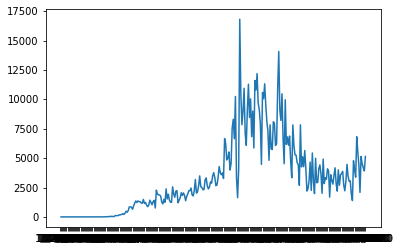

In [49]:
#line graph

CA_daily_cases= daily_cases_by_state["CA"]
TX_daily_cases=daily_cases_by_state["TX"]

plt.plot(CA_daily_cases)
plt.show()